# Investment Analysis Assignment
- by <font color=green>*****Shubhajit Roy Chowdhury*****</font>

## Checkpoint 1: Data Cleaning

In [2]:
import pandas as pd, numpy as np

In [3]:
companies = pd.read_csv('companies.csv', encoding='latin1')

In [4]:
rounds2 = pd.read_csv('rounds2.csv', encoding='latin1')

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [7]:
companies.shape

(66368, 10)

In [8]:
rounds2.shape

(114949, 6)

**Observation**: As the permalink and company_permalink column data is camel case and not consistant in both the dataframe, thats why making it to upper so that can merge both the dataframe.

In [9]:
#formating permalink column data to upper case as this data is not in same case
companies['permalink'] = companies['permalink'].apply(lambda x : x.upper())

In [10]:
#formating permalink column data to upper case as this data is not in same case
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x : x.upper())

### Table-1.1 Understand the Data Set 

##### Question:
- <font color=blue>How many unique companies are present in rounds2? </font>

In [11]:
uni_rounds2 = pd.unique(rounds2['company_permalink'])
uni_rounds2.size

66370

##### Question:
- <font color=blue>How many unique companies are present in the companies file?</font>

In [12]:
uni_companies = pd.unique(companies['permalink'])
uni_companies.size

66368

##### Question:
- <font color=blue>In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.</font>

In [13]:
#Getting dataframe null info
companies['permalink'].value_counts().sum()

66368

**Observation**: As 'permalink' column is having is same number of records as unique value we can use it as unique key in companies dataframe.

##### Question:
- <font color=blue>Are there any companies in the rounds2 file which are not  present in companies ? Answer Y/N.</font>

In [14]:
rounds2[~rounds2['company_permalink'].isin(companies['permalink'])]['company_permalink'].nunique()

7

**Observation**: So as there is 7 companies present extra in rounds2 dataframe.

##### Question:
- <font color=blue>Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame? </font> 

In [15]:
#using inner as rounds2 is having more company than companies dataframe. So there is no point of keeping extra data from rounds2 datafame as most of it will be null.
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on='permalink')

In [16]:
#Verifing all the columns after merge
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [17]:
master_frame.shape

(114942, 16)

In [18]:
# removing redundant columns
master_frame =  master_frame.drop(['company_permalink'], axis=1) 
master_frame.shape

(114942, 15)

#### Missing Value Treatment

In [19]:
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [20]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

**Observation**: There are below mentioned missing value present in important columns which neeed to be removed. I am removing the data as the percentage of null data is less
- 7.54% missing values in country_code column.
- 2.96% missing value in category_list.
- 17.39% missing value in raised_amount_usd.

In [21]:
#cleaning 'country_code' null data 
master_frame = master_frame[~master_frame['country_code'].isnull()]

In [22]:
#cleaning 'category_list' null data
master_frame = master_frame[~master_frame['category_list'].isnull()]

In [23]:
#cleaning 'raised_amount_usd' null data
master_frame = master_frame[~master_frame['raised_amount_usd'].isnull()]

In [24]:
master_frame.isnull().sum()

funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
dtype: int64

**Observation**: No Missing values in country_code, category_list and raised_amount_usd column now. Other columns are having missing value but this columns no important for the analysis so can ignor as of now.

In [25]:
master_frame.shape

(88529, 15)

In [26]:
#checking column type details of companies dataframe
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114940
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  88529 non-null  object 
 1   funding_round_type       88529 non-null  object 
 2   funding_round_code       26776 non-null  object 
 3   funded_at                88529 non-null  object 
 4   raised_amount_usd        88529 non-null  float64
 5   permalink                88529 non-null  object 
 6   name                     88528 non-null  object 
 7   homepage_url             85278 non-null  object 
 8   category_list            88529 non-null  object 
 9   status                   88529 non-null  object 
 10  country_code             88529 non-null  object 
 11  state_code               86798 non-null  object 
 12  region                   87345 non-null  object 
 13  city                     87348 non-null  object 
 14  founded_at           

**Observation**: No need to change any column type.

## Checkpoint 2: Funding Type Analysis

### Table-2.1 Representative Values of Investments for Each of these Funding Types

In [27]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

**Note**: Norrowing down the analysis to mentioned 4 (venture, angel, seed, and private equity) funding types only.

In [28]:
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

In [29]:
funding_type = ['venture', 'angel', 'seed', 'private_equity']

In [30]:
master_frame = master_frame[master_frame['funding_round_type'].isin(funding_type)]

In [31]:
#verifying the data
master_frame['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [32]:
master_frame.shape

(75124, 15)

#### Visualising data

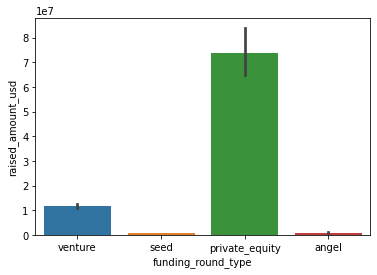

In [33]:
sns.barplot(data = master_frame, x="funding_round_type", y="raised_amount_usd", estimator=np.mean)
plt.show()

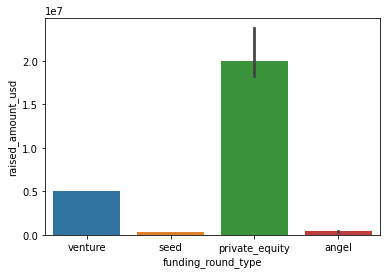

In [34]:
#mean bar plot
sns.barplot(data = master_frame, x="funding_round_type", y="raised_amount_usd", estimator=np.median)
plt.show()

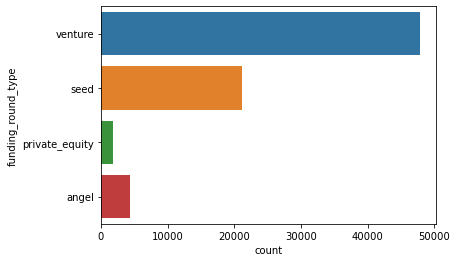

In [35]:
#median bar plot
sns.countplot(data=master_frame, y='funding_round_type')
plt.show()

##### Question
- <font color=blue>Representative funding amount of venture type</font>

In [36]:
#filtering venture type data
venture = master_frame[master_frame["funding_round_type"] == "venture"]

In [37]:
venture.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,raised_amount_usd
count,47809.00000
mean,11724222.69020
std,88215713.61486
min,0.00000
25%,1600000.00000
50%,5000000.00000
75%,12000000.00000
max,17600000000.00000


**Observation**: As there is outlier best way present the data is median

In [38]:
print('Representative funding amount of venture type :', venture.median())

Representative funding amount of venture type : raised_amount_usd    5000000.0
dtype: float64


##### Question
- <font color=blue>Representative funding amount of angel type</font>

In [39]:
#filtering angel type data
angel = master_frame[master_frame["funding_round_type"] == "angel"]

In [40]:
angel.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,raised_amount_usd
count,4400.00000
mean,971573.89114
std,7710904.33259
min,0.00000
25%,152756.50000
50%,414906.00000
75%,1000000.00000
max,494511992.00000


**Observation**: As there is outlier best way present the data is median

In [41]:
print('Representative funding amount of angel type :', angel.median())

Representative funding amount of angel type : raised_amount_usd    414906.0
dtype: float64


##### Question
- <font color=blue>Representative funding amount of seed type</font>

In [42]:
#filtering seed type data
seed = master_frame[master_frame["funding_round_type"] == "seed"]

In [43]:
seed.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,raised_amount_usd
count,21095.00000
mean,747793.68248
std,2288317.63786
min,0.00000
25%,68816.50000
50%,300000.00000
75%,1000000.00000
max,200000000.00000


**Observation**: As there is outlier best way present the data is median

In [44]:
print('Representative funding amount of seed type :', seed.median())

Representative funding amount of seed type : raised_amount_usd    300000.0
dtype: float64


##### Question
- <font color=blue>Representative funding amount of private equity type</font>

In [45]:
#filtering private equity type data
private_equity = master_frame[master_frame["funding_round_type"] == "private_equity"]

In [46]:
private_equity.describe().apply(lambda x: x.apply('{0:.5f}'.format))

,raised_amount_usd
count,1820.00000
mean,73938486.27527
std,201776467.38011
min,0.00000
25%,5000000.00000
50%,20000000.00000
75%,75762572.00000
max,4745460219.00000


**Observation**: As there is outlier best way present the data is median

In [47]:
#as there is outlier best will median 
print('Representative funding amount of private equity type :', private_equity.median())

Representative funding amount of private equity type : raised_amount_usd    20000000.0
dtype: float64


##### Question
- <font color=blue>Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?</font>

In [48]:
lower_invst_range = 5000000.00
higher_invst_range = 15000000.00

In [49]:
(master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median() >= lower_invst_range) & (master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median() <= higher_invst_range)

funding_round_type
angel             False
private_equity    False
seed              False
venture            True
Name: raised_amount_usd, dtype: bool

**Observation**: Venuture funding round type will more suitable as most of its investment is in required range

## Checkpoint 3: Country Analysis

### Table - 3.1 Analysing the Top 3 English-Speaking Countries 

##### Questions
- <font color=blue>Top English speaking country</font>
- <font color=blue>Second English speaking country</font>
- <font color=blue>Third English speaking country</font>

In [50]:
top9 = venture.groupby(['country_code'])['raised_amount_usd'].sum().sort_values(ascending = False).head(9)

In [51]:
top9

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

**Observation**: From the above list need to consider only english speaking countries. Which is USA, GBR, IND, CAN.
                 So top three countires will be USA, GBR and IND

## Checkpoint 4: Sector Analysis 1

In [52]:
#loading mapping.csv
mapping = pd.read_csv("mapping.csv")

In [53]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [54]:
mapping.tail()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
683,Wholesale,0,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,0,1,0,0,0,0,0
685,Wireless,0,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,0,1,0
687,Young Adults,0,0,0,0,0,0,0,1,0


In [55]:
mapping.sample(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
362,Indoor Positioning,0,0,0,0,0,0,0,1,0
546,Professio0l Networking,0,0,0,0,0,0,1,0,0
290,Fruit,0,0,0,0,0,0,0,1,0
460,Mobile Video,0,0,0,1,0,0,0,0,0
386,iPad,0,0,0,0,0,0,0,1,0
255,Estimation and Quoting,0,0,0,0,0,0,0,0,1
567,Reputation,0,0,0,0,0,0,0,1,0
372,Intellectual Asset Ma0gement,0,0,0,0,0,0,0,1,0
425,Manufacturing,0,0,0,0,0,1,0,0,0
201,Direct Marketing,0,0,0,0,0,0,1,0,0


In [56]:
mapping.shape

(688, 10)

In [57]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

**Observation**: mapping dataframe is having 1 record in category_list column which is null. And there is a data corruption. Instread of 'na' 0 is present in the category_list. Need to addess this two issues. As we need to merge mapping and master_frame converting catagory_list to upper case to avoid data mismatch.

In [58]:
#cleaning mapping data
mapping = mapping.dropna(axis=0, subset=['category_list'])

In [59]:
#data fixing for 0 to 'na'
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na').upper())

In [60]:
mapping.sample(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
83,BUSINESS PRODUCTIVITY,0,0,0,0,0,0,0,0,1
284,FOOD PROCESSING,0,0,0,0,0,1,0,0,0
30,APPLICATION PERFORMANCE MONITORING,0,0,0,0,0,0,1,0,0
161,CREATIVE,0,0,0,1,0,0,0,0,0
666,VIDEO CONFERENCING,0,0,0,1,0,0,0,0,0
389,IT MANAGEMENT,0,0,0,0,0,0,0,1,0
251,ENTERTAINMENT,0,0,0,1,0,0,0,0,0
111,CLOUD COMPUTING,0,0,0,0,0,0,1,0,0
573,RFID,0,0,0,0,0,0,0,1,0
32,APPS,0,0,0,0,0,0,1,0,0


In [61]:
#checking data
mapping['category_list'].str.contains('2.NA').value_counts()

False    686
True       1
Name: category_list, dtype: int64

In [62]:
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('2.NA','2.0').upper())

**Observation**: As mapping dataframe is in wide format, converting it to long format.

In [63]:
# store the value variables in one Series
value_vars = list(mapping.columns[1:])

# take the setdiff() to get the rest of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))

print(value_vars, "\n")
print(id_vars)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising'] 

['category_list']


In [64]:
# convert into long
mapping_df = pd.melt(mapping, 
        id_vars = id_vars, 
        value_vars = value_vars)
mapping_df

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D PRINTING,Automotive & Sports,0
2,3D TECHNOLOGY,Automotive & Sports,0
3,ACCOUNTING,Automotive & Sports,0
4,ACTIVE LIFESTYLE,Automotive & Sports,0
...,...,...,...
6178,WHOLESALE,"Social, Finance, Analytics, Advertising",0
6179,WINE AND SPIRITS,"Social, Finance, Analytics, Advertising",0
6180,WIRELESS,"Social, Finance, Analytics, Advertising",0
6181,WOMEN,"Social, Finance, Analytics, Advertising",0


In [65]:
# remove rows having value=0
mapping_df = mapping_df[mapping_df['value']==1]
mapping_df = mapping_df.drop('value', axis=1)

In [66]:
# renaming the 'variable' column
mapping_df = mapping_df.rename(columns={'variable': 'primary_sector'})

In [67]:
mapping_df.sample(10)

,category_list,primary_sector
5539,AUGMENTED REALITY,"Social, Finance, Analytics, Advertising"
1935,RECYCLING,Cleantech / Semiconductors
4709,SEO,"News, Search and Messaging"
4153,APPS,"News, Search and Messaging"
5446,TAXIS,Others
4695,RIDE SHARING,"News, Search and Messaging"
3268,PHARMACEUTICALS,Health
2525,MUSIC,Entertainment
2706,TICKETING,Entertainment
6098,SOCIAL + MOBILE + LOCAL,"Social, Finance, Analytics, Advertising"


In [68]:
mapping_df.shape

(687, 2)

**Note**: Treating master_frame category_list data. As there are mutiple data separated by | so as per business logic only need to consider first category only. Converting new column to upper case for merge purpose.

In [69]:
master_frame.shape

(75124, 15)

In [70]:
master_frame['primary_category'] = master_frame['category_list'].apply(lambda x : x.split('|')[0].upper())

In [71]:
master_frame.sample(10)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category
30050,/funding-round/7cd2c518f65a6a112724f95ae6d298f1,seed,NaN,01-01-2012,250000.0,/ORGANIZATION/ECHOGRAPH,Echograph,http://echograph.com,Photography|Software|Video,acquired,USA,CA,Los Angeles,El Segundo,01-10-2012,PHOTOGRAPHY
106721,/funding-round/461654a963196024c3ff93722e0713dd,angel,NaN,12-11-2014,270000.0,/ORGANIZATION/VERYAPT,VeryApt,http://VeryApt.com,Real Estate|Rental Housing,operating,USA,PA,Philadelphia,Philadelphia,14-11-2013,REAL ESTATE
42116,/funding-round/dc7a5743419a923259461f7751cf589b,seed,NaN,26-01-2011,500000.0,/ORGANIZATION/GROVE-STREAMS,Grove Streams,http://www.grovestreams.com,Agriculture|Analytics|Big Data|Business Intell...,operating,USA,MN,Minneapolis,Maple Grove,26-01-2011,AGRICULTURE
65723,/funding-round/539fe9aa511abb5f155f91d4ccc91e90,venture,NaN,26-04-2010,101777.0,/ORGANIZATION/NANOLUMENS,NanoLumens,http://www.nanolumens.com,Hardware + Software,operating,USA,GA,Atlanta,Norcross,01-01-2006,HARDWARE + SOFTWARE
19984,/funding-round/69fc48ee869c1d9a5ba79ca58a3e67cd,seed,NaN,11-09-2014,25000.0,/ORGANIZATION/CITY-NOSTRA,City Nostra,http://www.citynostra.com/,Video Games,operating,ESP,56,Barcelona,Barcelona,01-01-2013,VIDEO GAMES
80937,/funding-round/da39c532c89374b962544aa76dbb3cb7,venture,NaN,07-02-2003,21000000.0,/ORGANIZATION/RACKABLE-SYSTEMS,Rackable Systems,http://rackable.com/,Web Hosting,ipo,USA,CA,SF Bay Area,San Jose,NaN,WEB HOSTING
96797,/funding-round/6953d69e7171eb9ba278736ea7e15327,venture,NaN,01-07-2010,4000000.0,/ORGANIZATION/SYMFORM,Symform,http://www.symform.com,Cloud Computing|Cloud Data Services|Storage|We...,acquired,USA,WA,Seattle,Seattle,01-01-2007,CLOUD COMPUTING
63045,/funding-round/36dba456e0148cb1a0b01b1dd2d01f31,venture,A,30-10-2012,3100000.0,/ORGANIZATION/MOBIPLEX,Mobiplex,http://www.mobiplex.com,Android|Mobile,operating,USA,CA,SF Bay Area,Santa Clara,01-11-2010,ANDROID
17801,/funding-round/e5c90881a59b63c7a7c43a0f1abf25f0,venture,F,27-07-2015,11700000.0,/ORGANIZATION/CASTLE-BIOSCIENCES,Castle Biosciences,http://castlebiosciences.com,Biotechnology,operating,USA,TX,Houston,Friendswood,01-01-2008,BIOTECHNOLOGY
79140,/funding-round/cf9fca2ea728159e938f2a585b946dca,seed,NaN,01-12-2013,65482.0,/ORGANIZATION/PROVENANCE,Provenance,https://www.provenance.org,SaaS,operating,GBR,H9,London,London,01-01-2014,SAAS


In [72]:
master_frame.shape

(75124, 16)

In [73]:
master_frame = pd.merge(master_frame, mapping_df, how='inner', left_on='primary_category', right_on='category_list')

In [74]:
master_frame.shape

(75086, 18)

In [75]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75086 entries, 0 to 75085
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  75086 non-null  object 
 1   funding_round_type       75086 non-null  object 
 2   funding_round_code       26758 non-null  object 
 3   funded_at                75086 non-null  object 
 4   raised_amount_usd        75086 non-null  float64
 5   permalink                75086 non-null  object 
 6   name                     75085 non-null  object 
 7   homepage_url             72530 non-null  object 
 8   category_list_x          75086 non-null  object 
 9   status                   75086 non-null  object 
 10  country_code             75086 non-null  object 
 11  state_code               73558 non-null  object 
 12  region                   74055 non-null  object 
 13  city                     74058 non-null  object 
 14  founded_at            

In [76]:
# removing redundant columns and renameing columns
master_frame =  master_frame.drop(['category_list_y'], axis=1)
master_frame = master_frame.rename(columns={'category_list_x': 'category_list'})

In [77]:
master_frame.sample(10)

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,primary_sector
52189,/funding-round/5e71424010401249e1e1f4b81c0eb191,venture,NaN,22-01-2015,579233.0,/ORGANIZATION/ANYCOIN-DIRECT,Anycoin Direct,https://anycoindirect.eu/en,Bitcoin|Payments|Virtual Currency,operating,NLD,6,NLD - Other,Veghel,NaN,BITCOIN,Cleantech / Semiconductors
8193,/funding-round/4c5be06793f3cf463fb31c10057cf693,venture,NaN,04-11-2015,10564310.0,/ORGANIZATION/OSSDSIGN-AB,OssDsign AB,http://www.ossdsign.com,Biotechnology,operating,SWE,21,Stockholm,Uppsala,01-06-2011,BIOTECHNOLOGY,Cleantech / Semiconductors
16417,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,C,21-01-2014,15000000.0,/ORGANIZATION/FIRSTCRY-COM,FirstCry.com,http://www.firstcry.com,E-Commerce,operating,IND,16,Pune,Pune,01-01-2010,E-COMMERCE,Others
57596,/funding-round/b836a4ee966f71cd8739c91670fceb80,venture,NaN,11-02-2004,10822832.0,/ORGANIZATION/ELLIPTEC-AG,Elliptec AG,http://www.elliptec.com,Automotive,closed,DEU,7,Dortmund,Dortmund,NaN,AUTOMOTIVE,Automotive & Sports
67574,/funding-round/d32049dbc6f96878d2ab655ec7d079d1,venture,B,01-11-2004,5102995.0,/ORGANIZATION/MEDIAN-TECHNOLOGIES,Median Technologies,http://mediantechnologies.com,Pharmaceuticals,operating,FRA,B8,Nice,Valbonne,01-01-2002,PHARMACEUTICALS,Health
23241,/funding-round/0da54fa4c56a68b10b6e30d7a20e7c02,venture,NaN,04-06-2014,1125000.0,/ORGANIZATION/KATUAH-MARKET,Katuah Market,http://www.katuahmarket.com/,Hospitality,operating,USA,NC,Asheville,Asheville,01-01-2011,HOSPITALITY,Others
20200,/funding-round/7dd93ab2cb12bea1eb2358a01918e565,venture,NaN,20-04-2015,1150000.0,/ORGANIZATION/WINVIEW,"WinView, Inc.",http://www.winviewgames.com,Apps|Fantasy Sports|Games,operating,USA,CA,SF Bay Area,Redwood City,01-01-2008,APPS,"News, Search and Messaging"
58541,/funding-round/a16454d2224d9d0535ca1dd861db0e2e,venture,B,01-04-2007,4800000.0,/ORGANIZATION/AIPAI,Aipai,http://www.aipai.com,Photography,operating,CHN,30,Guangzhou,Guangzhou,NaN,PHOTOGRAPHY,Entertainment
13505,/funding-round/7d5cea0da6880513510ecb112c9a3ff2,venture,NaN,20-08-2010,2730812.0,/ORGANIZATION/CELTRO,Celtro,http://www.celtro.com,Mobile,operating,ISR,2,Tel Aviv,Petah Tiqva,05-04-2001,MOBILE,"News, Search and Messaging"
7294,/funding-round/2384ad0e4558e8120a0059a72dfdf0c5,venture,D,20-12-2012,33600000.0,/ORGANIZATION/MEDROBOTICS,Medrobotics,http://medrobotics.com,Biotechnology|Hardware,operating,USA,MA,MA - Other,Raynham,01-01-2011,BIOTECHNOLOGY,Cleantech / Semiconductors


In [78]:
master_frame.shape

(75086, 17)

## Checkpoint 5: Sector Analysis 2

### Table - 5.1 Sector-wise Investment Analysis

In [79]:
#creating a dataframe where country_code is USA and funding type is venture and invested amount is with in lower and higher range
D1 = master_frame[(master_frame['country_code'] == 'USA') &  (master_frame['funding_round_type'] == 'venture') & ((master_frame['raised_amount_usd'] >= lower_invst_range) & (master_frame['raised_amount_usd'] <= higher_invst_range))]

In [80]:
#creating a dataframe where country_code is GBR and funding type is venture and invested amount is with in lower and higher range
D2 = master_frame[(master_frame['country_code'] == 'GBR') &  (master_frame['funding_round_type'] == 'venture') & ((master_frame['raised_amount_usd'] >= lower_invst_range) & (master_frame['raised_amount_usd'] <= higher_invst_range))]

In [81]:
#creating a dataframe where country_code is IND and funding type is venture and invested amount is with in lower and higher range
D3 = master_frame[(master_frame['country_code'] == 'IND') &  (master_frame['funding_round_type'] == 'venture') & ((master_frame['raised_amount_usd'] >= lower_invst_range) & (master_frame['raised_amount_usd'] <= higher_invst_range))]

In [82]:
D1.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,primary_sector
6,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,/ORGANIZATION/ALL-DEF-DIGITAL,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,MEDIA,Entertainment
23,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,/ORGANIZATION/CHEFS-FEED,ChefsFeed,http://www.chefsfeed.com,Media|Mobile|Restaurants|Technology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,MEDIA,Entertainment
41,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,MEDIA,Entertainment
42,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,/ORGANIZATION/HUFFINGTONPOST,The Huffington Post,http://www.huffingtonpost.com,Media|News|Publishing,acquired,USA,NY,New York City,New York,09-05-2005,MEDIA,Entertainment
58,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,/ORGANIZATION/MATCHMINE,MatchMine,http://matchmine.com,Media|News|Reviews and Recommendations,closed,USA,MA,Boston,Needham,01-01-2007,MEDIA,Entertainment


In [83]:
D2.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,primary_sector
1,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
2,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,MEDIA,Entertainment
163,/funding-round/8195587cbd5e51af7514ee92ef4ba6ba,venture,NaN,09-07-2014,10000000.0,/ORGANIZATION/COMMON-INTEREST-COMMUNITIES,Common Interest Communities,http://commoninterestcommunities.com/,Application Platforms|Internet|Software|Startups,operating,GBR,H9,London,London,NaN,APPLICATION PLATFORMS,"News, Search and Messaging"
194,/funding-round/cf3fe3b7c86186b9f478d0ea37613f7a,venture,NaN,01-10-2014,5460000.0,/ORGANIZATION/GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,APPLICATION PLATFORMS,"News, Search and Messaging"
195,/funding-round/e5e4ef4ebae63fc36ef0cd57dd20ff1c,venture,A,05-10-2015,5400000.0,/ORGANIZATION/GEOSPOCK-LTD-,GeoSpock Ltd.,http://www.geospock.com,Application Platforms|Databases|Real Time,operating,GBR,C3,London,Cambridge,01-01-2013,APPLICATION PLATFORMS,"News, Search and Messaging"


In [84]:
D3.head()

,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_category,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA,Entertainment
447,/funding-round/b72eaac5ea12ac0f50573ac3d6d46b8d,venture,B,28-04-2015,10000000.0,/ORGANIZATION/BABAJOB,Babajob,http://www.babajob.com,Curated Web|Information Technology|Services|St...,operating,IND,19,Bangalore,Bangalore,27-08-2007,CURATED WEB,"News, Search and Messaging"
488,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,B,05-02-2008,11750000.0,/ORGANIZATION/BHARAT-MATRIMONY,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,CURATED WEB,"News, Search and Messaging"
532,/funding-round/452a7fc1f34df2d3dcda4e28234bc671,venture,A,24-01-2012,5000000.0,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,CURATED WEB,"News, Search and Messaging"
534,/funding-round/f5b252d6442ce231bb01586ca1821f63,venture,B,18-03-2014,10000000.0,/ORGANIZATION/BLUESTONE-COM,Bluestone.com,http://bluestone.com,Curated Web,operating,IND,19,Bangalore,Bangalore,01-01-2011,CURATED WEB,"News, Search and Messaging"


##### Question
- <font color=blue>Total number of Investments (count)</font>

In [85]:
print('Total Number of Investment for USA =', D1['raised_amount_usd'].count())

Total Number of Investment for USA = 12063


In [86]:
print('Total Number of Investment for GBR =', D2['raised_amount_usd'].count())

Total Number of Investment for GBR = 621


In [87]:
print('Total Number of Investment for IND =', D3['raised_amount_usd'].count())

Total Number of Investment for IND = 328


##### Question
- <font color=blue>Total amount of investment (USD)</font>

In [88]:
print('Total amount of investment (USD) for USA =', D1['raised_amount_usd'].sum())

Total amount of investment (USD) for USA = 107757097294.0


In [89]:
print('Total amount of investment (USD) for GBR =', D2['raised_amount_usd'].sum())

Total amount of investment (USD) for GBR = 5379078691.0


In [90]:
print('Total amount of investment (USD) for IND =', D3['raised_amount_usd'].sum())

Total amount of investment (USD) for IND = 2949543602.0


##### Question
- <font color=blue>Top Sector name (no. of investment-wise)</font>
- <font color=blue>Second Sector name (no. of investment-wise)</font>
- <font color=blue>Third Sector name (no. of investment-wise)</font>
- <font color=blue>Number of investments in top sector (3)</font>
- <font color=blue>Number of investments in second sector (4)</font>
- <font color=blue>Number of investments in third sector (5)</font>

In [91]:
D1.groupby('primary_sector')['raised_amount_usd'].count().sort_values(ascending = False)

primary_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

**Observation:** Top sectors for USA is 'Others : 2950', 'Social, Finance, Analytics, Advertising : 2714', 'Cleantech / Semiconductors : 2350'

In [92]:
D2.groupby('primary_sector')['raised_amount_usd'].count().sort_values(ascending = False)

primary_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

**Observation:** Top sectors for GBR is 'Others : 147', 'Social, Finance, Analytics, Advertising : 133', 'Cleantech / Semiconductors : 130'

In [93]:
D3.groupby('primary_sector')['raised_amount_usd'].count().sort_values(ascending = False)

primary_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

**Observation:** Top sectors for IND is 'Others : 110', 'Social, Finance, Analytics, Advertising : 60', 'News, Search and Messaging : 52'

##### Question
- <font color=blue>For point 3 (top sector count-wise), which company received the highest investment?</font>

In [94]:
D1[D1['primary_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

name
Virtustream    64300000.0
Name: raised_amount_usd, dtype: float64

In [95]:
D2[D2['primary_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

name
Electric Cloud    37000000.0
Name: raised_amount_usd, dtype: float64

In [96]:
D3[D3['primary_sector'] == 'Others'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

name
FirstCry.com    39000000.0
Name: raised_amount_usd, dtype: float64

##### Question
- <font color=blue>For point 4 (second best sector count-wise), which company received the highest investment?</font>

In [97]:
D1[D1['primary_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

name
SST Inc. (Formerly ShotSpotter)    67933006.0
Name: raised_amount_usd, dtype: float64

In [98]:
D2[D2['primary_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

name
Celltick Technologies    37500000.0
Name: raised_amount_usd, dtype: float64

In [99]:
D3[D3['primary_sector'] == 'Social, Finance, Analytics, Advertising'].groupby('name')['raised_amount_usd'].sum().sort_values(ascending = False).head(1)

name
Manthan Systems    50700000.0
Name: raised_amount_usd, dtype: float64

## Checkpoint 6: Plots

##### 1. A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

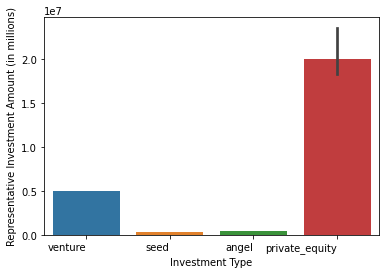

In [100]:
grf1 = sns.barplot(data=master_frame, x="funding_round_type", y="raised_amount_usd", estimator=np.median)
grf1.set_xticklabels(grf1.get_xticklabels(), ha="right")
grf1.set(xlabel = "Investment Type", ylabel = "Representative Investment Amount (in millions)")
plt.show()

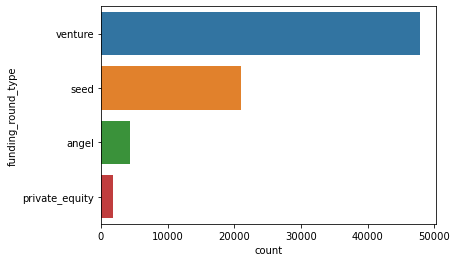

In [101]:
sns.countplot(data=master_frame, y="funding_round_type")
plt.show()

**Observation:** This two plot showcase that venture funding type will the best for Spark Funds to invest because
- As mentioned in upGrad site Private Equity means big amount of investment thats why in the first plot Private Equity is having higher investment value but Venture type suitable for investment as the invested amounts are in 5 - 15 million range. 
- In the second plot we can see count of investment is highst in the Veture type.
- Therefore venture funding type will be best suitable for Spark Funds to invest in.

##### 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.  

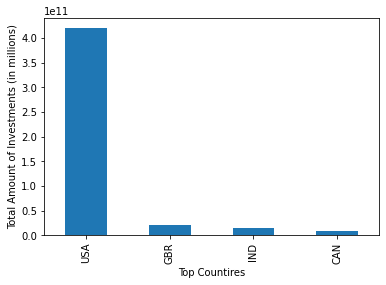

In [102]:
#as only below mentioned cpuntries are english speking
grf2 = top9[['USA','GBR','IND','CAN']].plot.bar()
grf2.set(xlabel = "Top Countires", ylabel = "Total Amount of Investments (in millions)")
plt.show()

**Observation:** In the above plot it is clear that top 3 English speaking countries are USD, GBR and IND.

##### 3. A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [103]:
#Filtering top 3 sector data for top 3 countries
D1_top_ft = D1[D1['primary_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D2_top_ft = D2[D2['primary_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
D3_top_ft = D3[D3['primary_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]

In [104]:
#appending all the dataframe
top_ft = D1_top_ft.append(D2_top_ft).append(D3_top_ft)

In [105]:
top_ft.shape

(8646, 17)

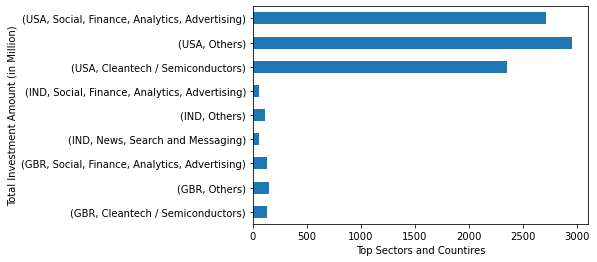

In [106]:
grf3 = top_ft.groupby(['country_code', 'primary_sector'])['raised_amount_usd'].count().plot.barh()
grf3.set(xlabel = "Top Sectors and Countires", ylabel = "Total Investment Amount (in Million)")
plt.show()

**Observation:** In the above plot it is clearly showing the number of investments in the top 3 sectors of the top 3 countries.